<a href="https://colab.research.google.com/github/italolima04/-quarentena-dados/blob/master/QuarentenaDados_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando Bibliotecas e Dados**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
grades = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
grades.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
movies = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
grades.shape

(100836, 4)

In [0]:
grades.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Desafio 3:**

Colocar o número de Avaliações por filme

In [0]:
def votes_per_movie(n):
  grades_movie = grades.query(f'movieId == {n}')['movieId']
  print('Número de Avaliações do Filme: ')
  return grades_movie.describe()['count']

In [0]:
votes_per_movie(32)

Número de Avaliações do Filme: 


177.0

In [0]:
grades['rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

In [0]:
twelve_monkeys = grades.query('movieId==32')
twelve_monkeys

,userId,movieId,rating,timestamp
301,4,32,2.0,945173447
581,6,32,4.0,845553426
1030,8,32,3.0,839463624
1390,14,32,4.0,835441168
1776,18,32,4.0,1455209840
...,...,...,...,...
96109,603,32,3.0,963179615
97053,604,32,4.0,832079958
97373,606,32,4.0,1173653921
98675,608,32,3.5,1117336682


In [0]:
twelve_monkeys.describe()

,userId,movieId,rating,timestamp
count,177.000000,177.0,177.000000,1.770000e+02
mean,306.203390,32.0,3.983051,1.082792e+09
std,175.067433,0.0,0.790387,2.217015e+08
min,4.000000,32.0,1.000000,8.297598e+08
25%,160.000000,32.0,3.500000,8.544720e+08
50%,305.000000,32.0,4.000000,1.043341e+09
75%,451.000000,32.0,5.000000,1.237859e+09
max,610.000000,32.0,5.000000,1.535710e+09


In [0]:
grades.query('movieId==32')['rating'].mean()

3.983050847457627

In [0]:
len(grades['movieId'].unique())

9724

In [0]:
notas = grades['rating'].unique()
notas 

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [0]:
average_grades = grades.groupby('movieId').mean()['rating']
average_grades.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [0]:
average_movies = movies.join(average_grades, on="movieId")
average_movies.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


**Desafio 2:**

Mudar o nome da coluna utilizando um método diferente do apresentado acima.

In [0]:
average_movies = average_movies.rename(columns= {'rating' : 'mean'})
average_movies.head()

,movieId,title,genres,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
average_movies.sort_values('mean', ascending=False)

,movieId,title,genres,mean
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [0]:
#Quantidade de filmes que receberam votos
average_movies['mean'].notna().sum()

9724

In [0]:
#Quantidade de filmes que não reberam votos
average_movies['mean'].isna().sum()

18

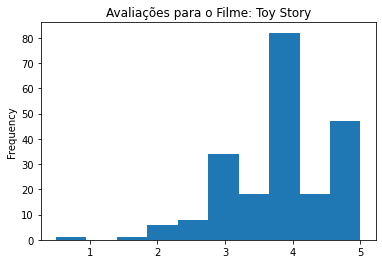

In [0]:
grades.query('movieId == 1')['rating'].plot(kind='hist')
plt.title("Avaliações para o Filme: Toy Story")
plt.show()

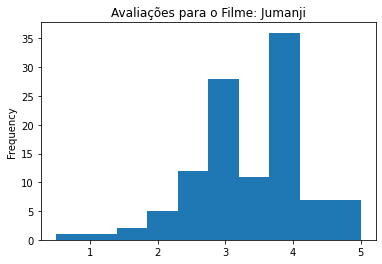

In [0]:
grades.query('movieId == 2')['rating'].plot(kind='hist')
plt.title("Avaliações para o Filme: Jumanji")
plt.show()

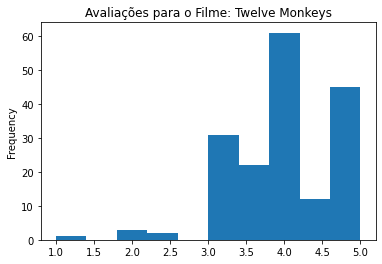

In [0]:
grades.query('movieId == 32')['rating'].plot(kind='hist')
plt.title("Avaliações para o Filme: Twelve Monkeys")
plt.show()

**Desafio 6:**
Descobrir quantos e quais são os gêneros

In [0]:
genres = movies['genres'].str.get_dummies('|')
genres = genres.columns
#Quantos são os gêneros
len(genres)


20

In [0]:
#Quais são os Gêneros
genres

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [0]:
#Contar a quantidade de gêneros por cada filme
data_genres = movies['genres'].str.get_dummies('|').sum(axis=1).value_counts
data_genres

<bound method IndexOpsMixin.value_counts of 0       5
1       3
2       2
3       3
4       1
       ..
9737    4
9738    3
9739    1
9740    2
9741    1
Length: 9742, dtype: int64>

**Desafio 7:**
Descobrir a quantidade de filmes por gênero

In [0]:
data_genres = movies['genres'].str.get_dummies('|')
data_genres = data_genres.sum().sort_values(ascending=False)
data_genres

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [0]:
#plt.title('Número de Filmes Por Gênero')
#plt.ylabel('Gêneros')
#plt.xlabel('Qtd de Filmes')
#plt.barh(data_genres['Gêneros'], data_genres['Qtd'], color='Green')
#plt.show()

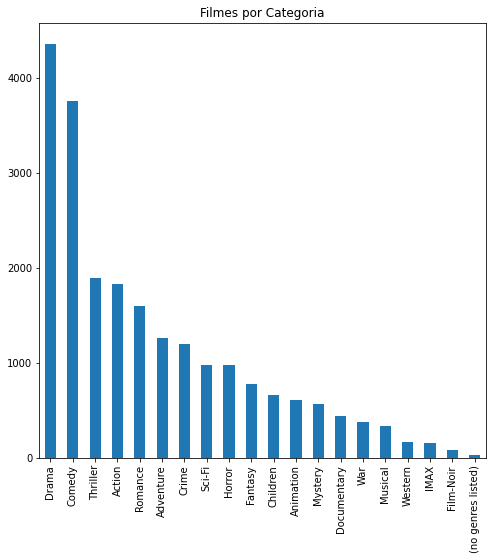

In [0]:
data_genres.plot(kind='bar', title='Filmes por Categoria', figsize=(8,8))
plt.show()

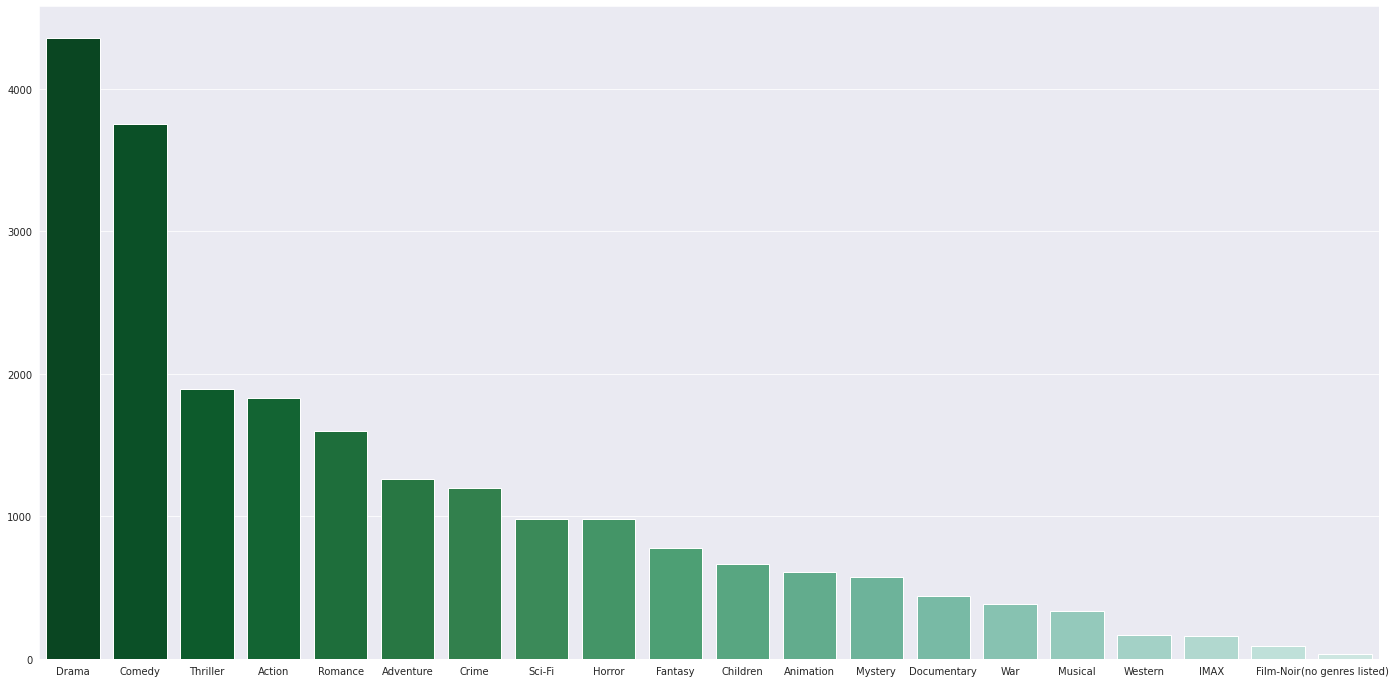

In [0]:
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(24,12))

sns.barplot(x=data_genres.index, 
            y= data_genres.values,
            palette=sns.color_palette('BuGn_r' ,n_colors=len(data_genres) + 6))
plt.show()